In [110]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import datetime
import matplotlib.pyplot as plt
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
#sns.set_context("poster") # ugly
sns.set_context("talk")  # better
plt.style.use('ggplot')

In [2]:
ls data/ready/

Astros_clean.csv*        DUMMY_Rockets_final.csv*  NBA.csv*
bas.csv*                 DUMMY_Texans_final.csv*   NFL.csv*
bkb.csv*                 DUMMY_UH_final.csv*       Rice_clean.csv*
cfbRU.csv*               dynamo_clean.csv*         Rockets_clean.csv*
cfbUH.csv*               fb.csv*                   soc.csv*
DUMMY_Astros_final.csv*  FINAL_DATA.csv*           Texans_clean.csv*
DUMMY_Dynamo_final.csv*  MLB.csv*                  UHCFB.csv*
DUMMY_Rice_final.csv*    MLS.csv*                  UH_clean.csv*


In [3]:
cfbuh = 'UHCFB'
cfbru = 'cfbRU'
bkb = 'NBA'
bsb = 'MLB'
fb = 'NFL'
soc = 'MLS'

In [8]:
path = 'data/ready/{}.csv'.format(soc)
df_mls = pd.read_csv(path)
df_mls = df_mls.drop(['10H30_beat'],axis=1)
df_mls.head()

,days,10H30_crime,10H30_sports,10H30_game
0,2010-01-01,3,MLS,None_MLS
1,2010-01-02,1,MLS,None_MLS
2,2010-01-03,2,MLS,None_MLS
3,2010-01-04,1,MLS,None_MLS
4,2010-01-05,2,MLS,None_MLS


In [10]:
path = 'data/ready/{}.csv'.format(bkb)
df_nba = pd.read_csv(path)
df_nba = df_nba.drop(['1A10_beat'],axis=1)

df_nba.head()

,days,1A10_crime,1A10_sports,1A10_game
0,2010-01-01,11,NBA,None_NBA
1,2010-01-02,11,NBA,None_NBA
2,2010-01-03,8,NBA,None_NBA
3,2010-01-04,6,NBA,None_NBA
4,2010-01-05,5,NBA,None_NBA


In [16]:
path = 'data/ready/{}.csv'.format(bsb)
df_mlb = pd.read_csv(path)
df_mlb = df_mlb.drop(['1A10_beat'],axis=1)

df_mlb.head()

,days,1A10_crime,1A10_sports,1A10_game
0,2010-01-01,11,MLB,None_MLB
1,2010-01-02,11,MLB,None_MLB
2,2010-01-03,8,MLB,None_MLB
3,2010-01-04,6,MLB,None_MLB
4,2010-01-05,5,MLB,None_MLB


In [17]:
path = 'data/ready/{}.csv'.format(fb)
df_nfl = pd.read_csv(path)
df_nfl = df_nfl.drop(['15E40_beat'],axis=1)

df_nfl.head()

,days,15E40_crime,15E40_sports,15E40_game
0,2010-01-01,2,NFL,None_NFL
1,2010-01-02,2,NFL,None_NFL
2,2010-01-03,5,NFL,Won_NFL
3,2010-01-04,2,NFL,None_NFL
4,2010-01-05,4,NFL,None_NFL


In [18]:
path = 'data/ready/{}.csv'.format(cfbuh)
df_uh = pd.read_csv(path)
df_uh = df_uh.drop(['10H50_beat'],axis=1)

df_uh.head()

,days,10H50_crime,10H50_sports,10H50_game
0,2010-01-01,5,CFB,None_CFB
1,2010-01-02,0,CFB,None_CFB
2,2010-01-03,1,CFB,None_CFB
3,2010-01-04,6,CFB,None_CFB
4,2010-01-05,1,CFB,None_CFB


In [19]:
path = 'data/ready/{}.csv'.format(cfbru)
df_ru = pd.read_csv(path)
df_ru = df_ru.drop(['10H80_beat'],axis=1)

df_ru.head()

,days,10H80_crime,10H80_sports,10H80_game
0,2010-01-01,0,CFB,None_CFB
1,2010-01-02,0,CFB,None_CFB
2,2010-01-03,4,CFB,None_CFB
3,2010-01-04,2,CFB,None_CFB
4,2010-01-05,3,CFB,None_CFB


In [20]:
dfs = [df_ru,df_uh,df_mlb,df_mls,df_nba,df_nfl]

In [32]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='days'), dfs)

In [33]:
df_final.head()

,days,10H80_crime,10H80_sports,10H80_game,10H50_crime,10H50_sports,10H50_game,1A10_crime_x,1A10_sports_x,1A10_game_x,10H30_crime,10H30_sports,10H30_game,1A10_crime_y,1A10_sports_y,1A10_game_y,15E40_crime,15E40_sports,15E40_game
0,2010-01-01,0,CFB,None_CFB,5,CFB,None_CFB,11,MLB,None_MLB,3,MLS,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL
1,2010-01-02,0,CFB,None_CFB,0,CFB,None_CFB,11,MLB,None_MLB,1,MLS,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL
2,2010-01-03,4,CFB,None_CFB,1,CFB,None_CFB,8,MLB,None_MLB,2,MLS,None_MLS,8,NBA,None_NBA,5,NFL,Won_NFL
3,2010-01-04,2,CFB,None_CFB,6,CFB,None_CFB,6,MLB,None_MLB,1,MLS,None_MLS,6,NBA,None_NBA,2,NFL,None_NFL
4,2010-01-05,3,CFB,None_CFB,1,CFB,None_CFB,5,MLB,None_MLB,2,MLS,None_MLS,5,NBA,None_NBA,4,NFL,None_NFL


In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 19 columns):
days             2923 non-null object
10H80_crime      2923 non-null int64
10H80_sports     2923 non-null object
10H80_game       2923 non-null object
10H50_crime      2923 non-null int64
10H50_sports     2923 non-null object
10H50_game       2923 non-null object
1A10_crime_x     2923 non-null int64
1A10_sports_x    2923 non-null object
1A10_game_x      2923 non-null object
10H30_crime      2923 non-null int64
10H30_sports     2923 non-null object
10H30_game       2923 non-null object
1A10_crime_y     2923 non-null int64
1A10_sports_y    2923 non-null object
1A10_game_y      2923 non-null object
15E40_crime      2923 non-null int64
15E40_sports     2923 non-null object
15E40_game       2923 non-null object
dtypes: int64(6), object(13)
memory usage: 456.7+ KB


## Any nulls?

In [35]:
df_final[df_final.isnull().any(axis=1)]

,days,10H80_crime,10H80_sports,10H80_game,10H50_crime,10H50_sports,10H50_game,1A10_crime_x,1A10_sports_x,1A10_game_x,10H30_crime,10H30_sports,10H30_game,1A10_crime_y,1A10_sports_y,1A10_game_y,15E40_crime,15E40_sports,15E40_game


## Remove duplicate col
- `1A10_crime_x`,`1A10_crime_y`  are the same, 
- drop one and rename 

In [36]:
df_final.drop(['1A10_crime_x'], axis=1,inplace=True)
df_final = df_final.rename(columns = {'1A10_crime_y':'1A10_crime'})

In [38]:
df_final.head()

,days,10H80_crime,10H80_sports,10H80_game,10H50_crime,10H50_sports,10H50_game,1A10_sports_x,1A10_game_x,10H30_crime,10H30_sports,10H30_game,1A10_crime,1A10_sports_y,1A10_game_y,15E40_crime,15E40_sports,15E40_game
0,2010-01-01,0,CFB,None_CFB,5,CFB,None_CFB,MLB,None_MLB,3,MLS,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL
1,2010-01-02,0,CFB,None_CFB,0,CFB,None_CFB,MLB,None_MLB,1,MLS,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL
2,2010-01-03,4,CFB,None_CFB,1,CFB,None_CFB,MLB,None_MLB,2,MLS,None_MLS,8,NBA,None_NBA,5,NFL,Won_NFL
3,2010-01-04,2,CFB,None_CFB,6,CFB,None_CFB,MLB,None_MLB,1,MLS,None_MLS,6,NBA,None_NBA,2,NFL,None_NFL
4,2010-01-05,3,CFB,None_CFB,1,CFB,None_CFB,MLB,None_MLB,2,MLS,None_MLS,5,NBA,None_NBA,4,NFL,None_NFL


## datetime days

In [41]:
#df_dm = pd.get_dummies(df_final)

df_final['days'] = pd.to_datetime(df_final['days'])
#df_final = df_final.set_index('days')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 18 columns):
days             2923 non-null datetime64[ns]
10H80_crime      2923 non-null int64
10H80_sports     2923 non-null object
10H80_game       2923 non-null object
10H50_crime      2923 non-null int64
10H50_sports     2923 non-null object
10H50_game       2923 non-null object
1A10_sports_x    2923 non-null object
1A10_game_x      2923 non-null object
10H30_crime      2923 non-null int64
10H30_sports     2923 non-null object
10H30_game       2923 non-null object
1A10_crime       2923 non-null int64
1A10_sports_y    2923 non-null object
1A10_game_y      2923 non-null object
15E40_crime      2923 non-null int64
15E40_sports     2923 non-null object
15E40_game       2923 non-null object
dtypes: datetime64[ns](1), int64(5), object(12)
memory usage: 513.9+ KB


In [42]:
df_final.head()

,days,10H80_crime,10H80_sports,10H80_game,10H50_crime,10H50_sports,10H50_game,1A10_sports_x,1A10_game_x,10H30_crime,10H30_sports,10H30_game,1A10_crime,1A10_sports_y,1A10_game_y,15E40_crime,15E40_sports,15E40_game
0,2010-01-01,0,CFB,None_CFB,5,CFB,None_CFB,MLB,None_MLB,3,MLS,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL
1,2010-01-02,0,CFB,None_CFB,0,CFB,None_CFB,MLB,None_MLB,1,MLS,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL
2,2010-01-03,4,CFB,None_CFB,1,CFB,None_CFB,MLB,None_MLB,2,MLS,None_MLS,8,NBA,None_NBA,5,NFL,Won_NFL
3,2010-01-04,2,CFB,None_CFB,6,CFB,None_CFB,MLB,None_MLB,1,MLS,None_MLS,6,NBA,None_NBA,2,NFL,None_NFL
4,2010-01-05,3,CFB,None_CFB,1,CFB,None_CFB,MLB,None_MLB,2,MLS,None_MLS,5,NBA,None_NBA,4,NFL,None_NFL


## Add Holiday column

In [43]:

# seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
# season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]
wknd = [5,6]
wkday = [0,1,2,3,4]

In [44]:
df_final['wkend'] = df_final['days'].dt.weekday.isin(wknd).astype('int')

In [45]:
df_final['wkday']= df_final['days'].dt.weekday.isin(wkday).astype('int')

In [46]:
cal = calendar()
holidays = cal.holidays(start=df_final.days.min(), end=df_final.days.max())
df_final['hol'] = df_final['days'].isin(holidays).astype('int')

In [ ]:
df

In [47]:
df_final.head()

,days,10H80_crime,10H80_sports,10H80_game,10H50_crime,10H50_sports,10H50_game,1A10_sports_x,1A10_game_x,10H30_crime,...,10H30_game,1A10_crime,1A10_sports_y,1A10_game_y,15E40_crime,15E40_sports,15E40_game,wkend,wkday,hol
0,2010-01-01,0,CFB,None_CFB,5,CFB,None_CFB,MLB,None_MLB,3,...,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL,0,1,1
1,2010-01-02,0,CFB,None_CFB,0,CFB,None_CFB,MLB,None_MLB,1,...,None_MLS,11,NBA,None_NBA,2,NFL,None_NFL,1,0,0
2,2010-01-03,4,CFB,None_CFB,1,CFB,None_CFB,MLB,None_MLB,2,...,None_MLS,8,NBA,None_NBA,5,NFL,Won_NFL,1,0,0
3,2010-01-04,2,CFB,None_CFB,6,CFB,None_CFB,MLB,None_MLB,1,...,None_MLS,6,NBA,None_NBA,2,NFL,None_NFL,0,1,0
4,2010-01-05,3,CFB,None_CFB,1,CFB,None_CFB,MLB,None_MLB,2,...,None_MLS,5,NBA,None_NBA,4,NFL,None_NFL,0,1,0


In [48]:
df_dum = pd.get_dummies(df_final)

In [49]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 33 columns):
days                    2923 non-null datetime64[ns]
10H80_crime             2923 non-null int64
10H50_crime             2923 non-null int64
10H30_crime             2923 non-null int64
1A10_crime              2923 non-null int64
15E40_crime             2923 non-null int64
wkend                   2923 non-null int64
wkday                   2923 non-null int64
hol                     2923 non-null int64
10H80_sports_CFB        2923 non-null uint8
10H80_game_Lost_CFB     2923 non-null uint8
10H80_game_None_CFB     2923 non-null uint8
10H80_game_Won_CFB      2923 non-null uint8
10H50_sports_CFB        2923 non-null uint8
10H50_game_Lost_CFB     2923 non-null uint8
10H50_game_None_CFB     2923 non-null uint8
10H50_game_Won_CFB      2923 non-null uint8
1A10_sports_x_MLB       2923 non-null uint8
1A10_game_x_Lost_MLB    2923 non-null uint8
1A10_game_x_None_MLB    2923 non-null uint8
1A10

In [50]:
df_dum.head()

,days,10H80_crime,10H50_crime,10H30_crime,1A10_crime,15E40_crime,wkend,wkday,hol,10H80_sports_CFB,...,10H30_game_None_MLS,10H30_game_Won_MLS,1A10_sports_y_NBA,1A10_game_y_Lost_NBA,1A10_game_y_None_NBA,1A10_game_y_Won_NBA,15E40_sports_NFL,15E40_game_Lost_NFL,15E40_game_None_NFL,15E40_game_Won_NFL
0,2010-01-01,0,5,3,11,2,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0
1,2010-01-02,0,0,1,11,2,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,2010-01-03,4,1,2,8,5,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
3,2010-01-04,2,6,1,6,2,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,2010-01-05,3,1,2,5,4,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


## Rename columns with same beat

In [59]:
df_dum = df_dum.rename(columns = {'1A10_sports_x_MLB':'1A10_sports_MLB',
                                      '1A10_game_x_Lost_MLB':'1A10_game_Lost_MLB',
                                      '1A10_game_x_Won_MLB': '1A10_game_Won_MLB',
                                      '1A10_game_x_None_MLB':'1A10_game_None_MLB',
                                      '1A10_sports_y_NBA':'1A10_sports_NBA',
                                      '1A10_game_y_Lost_NBA':'1A10_game_Lost_NBA',
                                      '1A10_game_y_Won_NBA': '1A10_game_Won_NBA',
                                      '1A10_game_y_None_NBA':'1A10_game_None_NBA',
                                     })

In [60]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 33 columns):
days                   2923 non-null datetime64[ns]
10H80_crime            2923 non-null int64
10H50_crime            2923 non-null int64
10H30_crime            2923 non-null int64
1A10_crime             2923 non-null int64
15E40_crime            2923 non-null int64
wkend                  2923 non-null int64
wkday                  2923 non-null int64
hol                    2923 non-null int64
10H80_sports_CFB       2923 non-null uint8
10H80_game_Lost_CFB    2923 non-null uint8
10H80_game_None_CFB    2923 non-null uint8
10H80_game_Won_CFB     2923 non-null uint8
10H50_sports_CFB       2923 non-null uint8
10H50_game_Lost_CFB    2923 non-null uint8
10H50_game_None_CFB    2923 non-null uint8
10H50_game_Won_CFB     2923 non-null uint8
1A10_sports_MLB        2923 non-null uint8
1A10_game_Lost_MLB     2923 non-null uint8
1A10_game_None_MLB     2923 non-null uint8
1A10_game_Won_MLB      2

In [163]:
path = 'data/ready/{}.csv'.format('DATA_FINAL')

df_dum.to_csv(path)

In [64]:
df_dum.describe()

,10H80_crime,10H50_crime,10H30_crime,1A10_crime,15E40_crime,wkend,wkday,hol,10H80_sports_CFB,10H80_game_Lost_CFB,...,10H30_game_None_MLS,10H30_game_Won_MLS,1A10_sports_NBA,1A10_game_Lost_NBA,1A10_game_None_NBA,1A10_game_Won_NBA,15E40_sports_NFL,15E40_game_Lost_NFL,15E40_game_None_NFL,15E40_game_Won_NFL
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.0,2923.000000,...,2923.000000,2923.000000,2923.0,2923.000000,2923.000000,2923.000000,2923.0,2923.000000,2923.000000,2923.000000
mean,2.559015,2.743414,1.504961,5.203900,5.607595,0.286350,0.713650,0.027369,1.0,0.006842,...,0.953130,0.024632,1.0,0.037633,0.887444,0.074923,1.0,0.009921,0.976394,0.013685
std,1.791738,1.786668,1.468897,2.962836,3.012461,0.452132,0.452132,0.163185,0.0,0.082449,...,0.211396,0.155028,0.0,0.190339,0.316103,0.263312,0.0,0.099127,0.151844,0.116198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,5.000000,5.000000,0.000000,1.000000,0.000000,1.0,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000
75%,4.000000,4.000000,2.000000,7.000000,7.000000,1.000000,1.000000,0.000000,1.0,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000
max,12.000000,14.000000,11.000000,36.000000,32.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [164]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 33 columns):
days                   2923 non-null datetime64[ns]
10H80_crime            2923 non-null int64
10H50_crime            2923 non-null int64
10H30_crime            2923 non-null int64
1A10_crime             2923 non-null int64
15E40_crime            2923 non-null int64
wkend                  2923 non-null int64
wkday                  2923 non-null int64
hol                    2923 non-null int64
10H80_sports_CFB       2923 non-null uint8
10H80_game_Lost_CFB    2923 non-null uint8
10H80_game_None_CFB    2923 non-null uint8
10H80_game_Won_CFB     2923 non-null uint8
10H50_sports_CFB       2923 non-null uint8
10H50_game_Lost_CFB    2923 non-null uint8
10H50_game_None_CFB    2923 non-null uint8
10H50_game_Won_CFB     2923 non-null uint8
1A10_sports_MLB        2923 non-null uint8
1A10_game_Lost_MLB     2923 non-null uint8
1A10_game_None_MLB     2923 non-null uint8
1A10_game_Won_MLB      2

In [65]:
## drop_date

In [66]:
dd = df_dum.drop(['days'],axis=1)

In [69]:
dd.describe()

,10H80_crime,10H50_crime,10H30_crime,1A10_crime,15E40_crime,wkend,wkday,hol,10H80_sports_CFB,10H80_game_Lost_CFB,...,10H30_game_None_MLS,10H30_game_Won_MLS,1A10_sports_NBA,1A10_game_Lost_NBA,1A10_game_None_NBA,1A10_game_Won_NBA,15E40_sports_NFL,15E40_game_Lost_NFL,15E40_game_None_NFL,15E40_game_Won_NFL
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.0,2923.000000,...,2923.000000,2923.000000,2923.0,2923.000000,2923.000000,2923.000000,2923.0,2923.000000,2923.000000,2923.000000
mean,2.559015,2.743414,1.504961,5.203900,5.607595,0.286350,0.713650,0.027369,1.0,0.006842,...,0.953130,0.024632,1.0,0.037633,0.887444,0.074923,1.0,0.009921,0.976394,0.013685
std,1.791738,1.786668,1.468897,2.962836,3.012461,0.452132,0.452132,0.163185,0.0,0.082449,...,0.211396,0.155028,0.0,0.190339,0.316103,0.263312,0.0,0.099127,0.151844,0.116198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,5.000000,5.000000,0.000000,1.000000,0.000000,1.0,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000
75%,4.000000,4.000000,2.000000,7.000000,7.000000,1.000000,1.000000,0.000000,1.0,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000
max,12.000000,14.000000,11.000000,36.000000,32.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [70]:
dd.head()

,10H80_crime,10H50_crime,10H30_crime,1A10_crime,15E40_crime,wkend,wkday,hol,10H80_sports_CFB,10H80_game_Lost_CFB,...,10H30_game_None_MLS,10H30_game_Won_MLS,1A10_sports_NBA,1A10_game_Lost_NBA,1A10_game_None_NBA,1A10_game_Won_NBA,15E40_sports_NFL,15E40_game_Lost_NFL,15E40_game_None_NFL,15E40_game_Won_NFL
0,0,5,3,11,2,0,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,1,11,2,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,4,1,2,8,5,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3,2,6,1,6,2,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,3,1,2,5,4,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


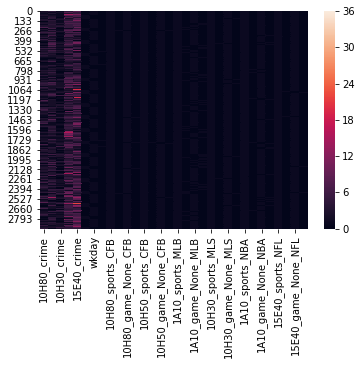

In [71]:
sns.heatmap(dd)

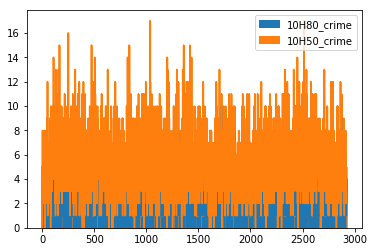

In [79]:
dd[['10H80_crime','10H50_crime']].plot.area()

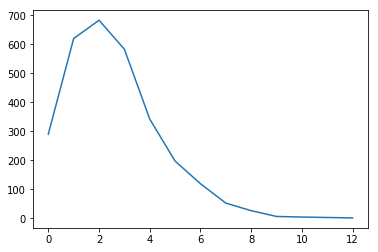

In [78]:
dd['10H80_crime'].value_counts().sort_index().plot.line()


In [77]:
df_dum.head()

,days,10H80_crime,10H50_crime,10H30_crime,1A10_crime,15E40_crime,wkend,wkday,hol,10H80_sports_CFB,...,10H30_game_None_MLS,10H30_game_Won_MLS,1A10_sports_NBA,1A10_game_Lost_NBA,1A10_game_None_NBA,1A10_game_Won_NBA,15E40_sports_NFL,15E40_game_Lost_NFL,15E40_game_None_NFL,15E40_game_Won_NFL
0,2010-01-01,0,5,3,11,2,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0
1,2010-01-02,0,0,1,11,2,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,2010-01-03,4,1,2,8,5,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
3,2010-01-04,2,6,1,6,2,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,2010-01-05,3,1,2,5,4,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


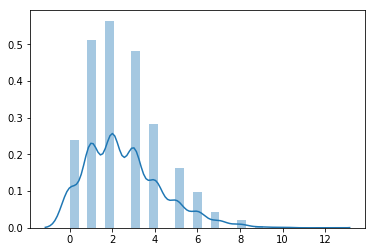

In [89]:
sns.distplot(dd[['10H80_crime']])

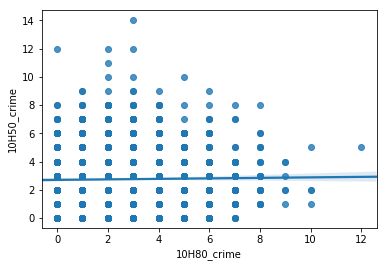

In [92]:
sns.regplot(data=df_dum,x='10H80_crime',y='10H50_crime')

In [94]:
#sns.pairplot(df_dum)

In [102]:
crd = dd.iloc[:,0:6] 

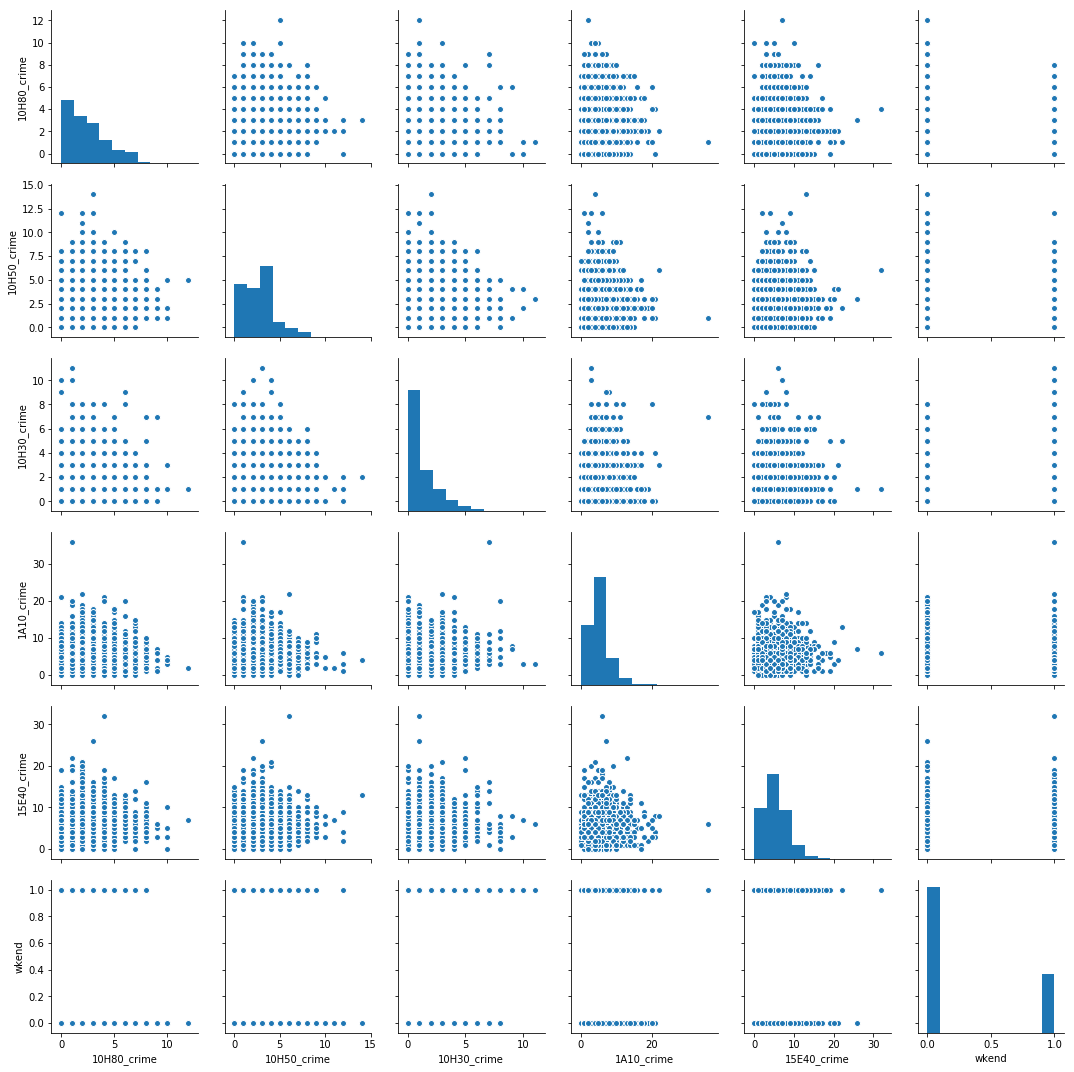

In [103]:
sns.pairplot(crd)

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 21 columns):
days             2923 non-null datetime64[ns]
10H80_crime      2923 non-null int64
10H80_sports     2923 non-null object
10H80_game       2923 non-null object
10H50_crime      2923 non-null int64
10H50_sports     2923 non-null object
10H50_game       2923 non-null object
1A10_sports_x    2923 non-null object
1A10_game_x      2923 non-null object
10H30_crime      2923 non-null int64
10H30_sports     2923 non-null object
10H30_game       2923 non-null object
1A10_crime       2923 non-null int64
1A10_sports_y    2923 non-null object
1A10_game_y      2923 non-null object
15E40_crime      2923 non-null int64
15E40_sports     2923 non-null object
15E40_game       2923 non-null object
wkend            2923 non-null int64
wkday            2923 non-null int64
hol              2923 non-null int64
dtypes: datetime64[ns](1), int64(8), object(12)
memory usage: 582.4+ KB


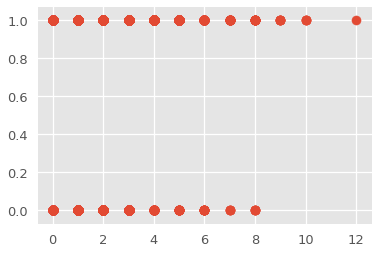

In [118]:
plt.scatter(df_final['10H80_crime'], df_final['wkday'])
plt.show()


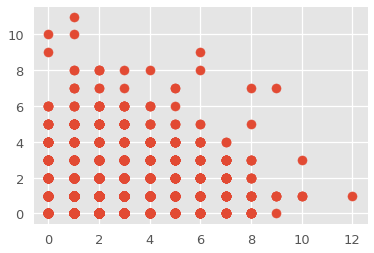

In [116]:
plt.scatter(df_final['10H80_crime'], df_final['10H30_crime'])
plt.show()


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: range parameter must be finite.

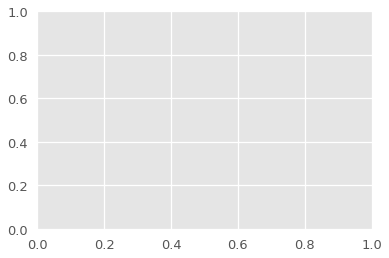

In [121]:
plt.hist(np.log(df_final['10H80_crime']))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

In [123]:

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [127]:
dd.head()

,10H80_crime,10H50_crime,10H30_crime,1A10_crime,15E40_crime,wkend,wkday,hol,10H80_sports_CFB,10H80_game_Lost_CFB,...,10H30_game_None_MLS,10H30_game_Won_MLS,1A10_sports_NBA,1A10_game_Lost_NBA,1A10_game_None_NBA,1A10_game_Won_NBA,15E40_sports_NFL,15E40_game_Lost_NFL,15E40_game_None_NFL,15E40_game_Won_NFL
0,0,5,3,11,2,0,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,1,11,2,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,4,1,2,8,5,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3,2,6,1,6,2,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,3,1,2,5,4,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [128]:

from sklearn.linear_model import LinearRegression
X = dd.drop('10H80_crime', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, dd['10H80_crime'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))


Estimated intercept coefficient: 2.115600998713444


In [131]:
print('Number of coefficients: {}'.format(len(lm.coef_)))


Number of coefficients: 31


In [132]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,10H50_crime,5.929273e-03
1,10H30_crime,1.892650e-02
2,1A10_crime,-6.300503e-03
3,15E40_crime,1.079870e-02
4,wkend,-4.098137e-01
5,wkday,4.098137e-01
6,hol,-1.023533e+00
7,10H80_sports_CFB,-3.053113e-16
8,10H80_game_Lost_CFB,-5.406823e-01
9,10H80_game_None_CFB,2.481352e-01


In [133]:
# first five predicted prices
lm.predict(X)[0:5]

array([1.78086412, 1.91727037, 1.79845977, 2.80397599, 2.82115402])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


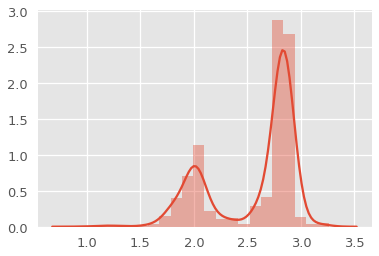

In [134]:
sns.distplot(lm.predict(X))


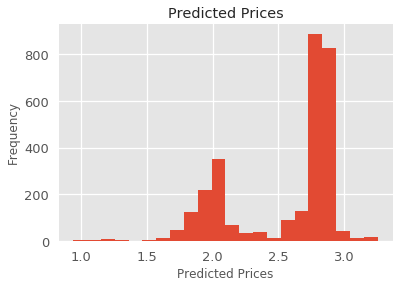

In [135]:

# your turn# your t 
plt.hist(lm.predict(X), bins='auto')
plt.title("Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

In [138]:
coll = dd['10H80_crime']
print(np.sum((coll - lm.predict(X)) ** 2))


8895.264285357587


In [139]:
print(np.sum(lm.predict(X) - np.mean(coll)) ** 2)


3.3476101373958857e-26


In [148]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 32 columns):
10H80_crime            2923 non-null int64
10H50_crime            2923 non-null int64
10H30_crime            2923 non-null int64
1A10_crime             2923 non-null int64
15E40_crime            2923 non-null int64
wkend                  2923 non-null int64
wkday                  2923 non-null int64
hol                    2923 non-null int64
10H80_sports_CFB       2923 non-null uint8
10H80_game_Lost_CFB    2923 non-null uint8
10H80_game_None_CFB    2923 non-null uint8
10H80_game_Won_CFB     2923 non-null uint8
10H50_sports_CFB       2923 non-null uint8
10H50_game_Lost_CFB    2923 non-null uint8
10H50_game_None_CFB    2923 non-null uint8
10H50_game_Won_CFB     2923 non-null uint8
1A10_sports_MLB        2923 non-null uint8
1A10_game_Lost_MLB     2923 non-null uint8
1A10_game_None_MLB     2923 non-null uint8
1A10_game_Won_MLB      2923 non-null uint8
10H30_sports_MLS       2923 non-n

In [150]:
crm10 = dd['10H80_crime']
cc = dd['10H80_game_Won_CFB']

# your turn# your t 
lm = LinearRegression()

X = crm10
X = X.values.reshape((-1,1))
lm.fit(X, cc)

prediction = lm.predict(X)
print('lm.coef_ : {}'.format(lm.coef_))
print('lm.intersept_ : {}'.format(lm.intercept_))

lm.coef_ : [-0.00127661]
lm.intersept_ : 0.011819730886949298


In [153]:

# ESS/TSS/R_sq# ESS/TS 
RSS = np.sum((cc - prediction) ** 2)
ESS = np.sum(prediction - np.mean(cc)) ** 2
R_sq = lm.score(X, cc)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 24.77089066043225
Explained Sum-of-Squares ESS      : 5.307092554753467e-30
Coefficient of Determination R-sq : 0.0006167922644101376


In [154]:
from sklearn.feature_selection import f_regression
F,p_val = f_regression(X, cc)
print('F-statistic: {}'.format(F[0]))

F-statistic: 1.8027621340816429


In [155]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 32 columns):
10H80_crime            2923 non-null int64
10H50_crime            2923 non-null int64
10H30_crime            2923 non-null int64
1A10_crime             2923 non-null int64
15E40_crime            2923 non-null int64
wkend                  2923 non-null int64
wkday                  2923 non-null int64
hol                    2923 non-null int64
10H80_sports_CFB       2923 non-null uint8
10H80_game_Lost_CFB    2923 non-null uint8
10H80_game_None_CFB    2923 non-null uint8
10H80_game_Won_CFB     2923 non-null uint8
10H50_sports_CFB       2923 non-null uint8
10H50_game_Lost_CFB    2923 non-null uint8
10H50_game_None_CFB    2923 non-null uint8
10H50_game_Won_CFB     2923 non-null uint8
1A10_sports_MLB        2923 non-null uint8
1A10_game_Lost_MLB     2923 non-null uint8
1A10_game_None_MLB     2923 non-null uint8
1A10_game_Won_MLB      2923 non-null uint8
10H30_sports_MLS       2923 non-n

In [156]:
# your turn
crm10 = dd['10H80_crime']

X = dd[['15E40_crime','10H50_crime','1A10_crime']]
X = X.values.reshape((-1,3))
lm = LinearRegression()
lm.fit(X, crm10)
prediction = lm.predict(X)

print('lm.coef_ : {}'.format(lm.coef_))
print('lm.intersept_: {}'.format(lm.intercept_))

lm.coef_ : [ 0.0130788   0.01703364 -0.01471162]
lm.intersept_: 2.515501569058179


In [158]:

# ESS/TSS/R_sq
RSS = np.sum((crm10 - prediction )** 2)
ESS = np.sum(prediction - np.mean(crm10)) ** 2
R_sq = lm.score(X, crm10)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 9367.589420887245
Explained Sum-of-Squares ESS      : 8.905924075583135e-26
Coefficient of Determination R-sq : 0.0013837689535134423


In [160]:
N = len(X)
K = 3
F = (R_sq/(1-R_sq))*(N-K-1)/K
print('F-statistic: ', F)

F-statistic:  1.3482728899345346


In [161]:
F,p_val = f_regression(X, crm10)
print('F-statistic: {}'.format(F))

F-statistic: [1.49061023 0.9231078  1.69152422]
